<a href="https://colab.research.google.com/github/aida-wofford/Andres/blob/main/Match_Fluxes_SlitC_Win22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Hbeta and Halpha fluxes in high-disp and low-disp spectra to match blue and red channels.

In [ ]:
def func(x, *params):
    nGauss = int((len(params)-2)/3)
    y = np.zeros_like(x)
    a = params[0]
    b = params[1]
    y = a + b*x
    for gaussian in range(nGauss):
        ctr = params[2+3*gaussian]
        amp = params[2+3*gaussian+1]
        wid = params[2+3*gaussian+2]
        y = y + amp * np.exp( -0.5*((x - ctr)/wid)**2)
    return y


#Retrieve redshift from NED.

#from astroquery.ned import Ned
#result_table = Ned.query_object('SMC')
#z = result_table['Redshift'][0]
#print(z)

In [ ]:
import numpy as np
win=['19','20','21','22','23','24','25']

irow=3

#path='../espectros_reajustados/'

#red=np.loadtxt(path+'spectra003R.00'+win[irow]+'_mod.txt', skiprows=1, delimiter=" ")
#xr, yr = np.transpose(red)

#ld=np.loadtxt(path+'spectra004L.00'+win[irow]+'.fits.txt', skiprows=0, delimiter="  ")
#xl, yl = np.transpose(ld)

path='../3_SlitC_34win/sin_ajustar/blue_spectra/'
blue=np.loadtxt(path+'spectra002.00'+win[irow]+'.fits.txt', skiprows=0, delimiter="  ")
xb, yb = np.transpose(blue)

path='../3_SlitC_34win/sin_ajustar/red_spectra/'
red=np.loadtxt(path+'spectra003R.00'+win[irow]+'.fits.txt', skiprows=0, delimiter="  ")
xr, yr = np.transpose(red)

path='../3_SlitC_34win/sin_ajustar/lowdis_spectra/'
ld=np.loadtxt(path+'spectra004L.00'+win[irow]+'.fits.txt', skiprows=0, delimiter="  ")
xl, yl = np.transpose(ld)

# The redshift from NED is no good
z=0.00068# redshift of [Ar IV] 4740 for window 14, when no other redshift or offset is applied

xb=xb/(1+z)
xr=xr/(1+z)
xl=xl/(1+z)

## BLUE CHANNEL

area1
40936.2307154298
area2
34969.353902064104
area1/area2
1.17063160017416
new_area1
34969.35428188892
new_area1/area2
1.000000010861648


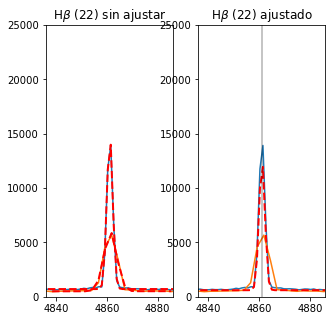

In [ ]:
# Hbeta redshifted
xbeta=4861.28

############################
# Porción del espectro alta dispersión cerca de Hbeta
############################
subx, suby = np.transpose(np.array([pair for pair in zip(xb, yb) if pair[0] > xbeta-25 and pair[0] < xbeta+25]))

# Ajuste azul alta dispersión
guess = [250, 0,                   #continuum constant, slope
        xbeta, 20000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

popt, pcov = curve_fit(func, subx, suby, p0=guess)
perr = np.sqrt(np.diag(pcov))
fith = func(subx, *popt)

area1=np.sqrt(2*3.1416)*popt[3]*popt[4]
print('area1')
print(area1)

############################
# Porción del espectro baja dispersión cerca de Hebta
############################
subxx, subyy = np.transpose(np.array([pair for pair in zip(xl, yl) if pair[0] > xbeta-25 and pair[0] < xbeta+25]))

# Ajuste azul alta dispersión
guess = [250, 0,                   #continuum constant, slope
        xbeta, 5000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

popt, pcov = curve_fit(func, subxx, subyy, p0=guess)
perr = np.sqrt(np.diag(pcov))
fitl = func(subxx, *popt)

area2=np.sqrt(2*3.1416)*popt[3]*popt[4]
print('area2')
print(area2)
print('area1/area2')
print(area1/area2)

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(5,5))
plt.subplots_adjust(hspace=0.35)
(ax1,ax2)= axes

ax1.plot(xb, yb)
ax1.plot(xl, yl)
ax1.set_title(r'H$\beta$ ('+str(win[irow])+') sin ajustar')
ax1.set_xlim(4861-25,4861+25)
ax1.set_ylim(0,25000)

ax1.plot(subx, fith , color='red', linestyle='dashed', zorder=10, linewidth=2) 
ax1.plot(subxx, fitl , color='red', linestyle='dashed', zorder=10, linewidth=2) 

############################
# Porción del espectro alta dispersión cerca de Hbeta
############################

new_suby = suby/(area1/area2) 
new_yb = yb/(area1/area2)

# Ajuste azul alta dispersión
guess = [250, 0,                   #continuum constant, slope
        xbeta, 20000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

popt, pcov = curve_fit(func, subx, new_suby, p0=guess)
perr = np.sqrt(np.diag(pcov))
new_fith = func(subx, *popt)

new_area1=np.sqrt(2*3.1416)*popt[3]*popt[4]
print('new_area1')
print(new_area1)
print('new_area1/area2')
print(new_area1/area2)

ax2.plot(xb, yb)
ax2.plot(xl, yl)
ax2.set_title(r'H$\beta$ ('+str(win[irow])+') ajustado')
ax2.set_xlim(4861-25,4861+25)
ax2.set_ylim(0,25000)

ax2.plot(subx, new_fith , color='red', linestyle='dashed', zorder=10, linewidth=2) 
#ax2.plot(subxx, fitl , color='red', linestyle='dashed', zorder=10, linewidth=2) 

ax2.axvline(x=xbeta,color='black',alpha=0.3,zorder=10)

import csv
path='./slit_c_win'+win[irow]+'_blue.txt'
with open(path, "w", newline='') as outcsv:#open file for writting
    writer = csv.writer(outcsv)
    writer.writerow(["Wavelength(A)", "Flux(erg/s/cm2)", "Original(erg/s/cm2)"])    
    writer = csv.writer(outcsv, delimiter=',')
    for i in range(len(xb)):
        writer.writerow([xb[i],new_yb[i], yb[i]])

## RED CHANNEL

area1
108880.64448094113
area2
52189.69237258341
area1/area2
2.0862480603188787
new_area1
52189.67812182233
new_area1/area1
0.9999997269429952


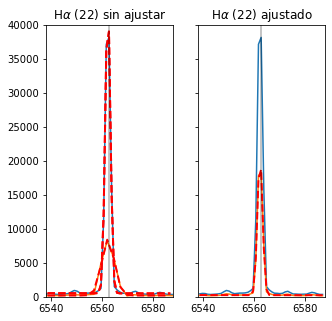

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(5,5))
plt.subplots_adjust(hspace=0.35)
(ax1,ax2)= axes

ax1.plot(xr, yr)
ax1.plot(xl, yl)
ax1.set_title(r'H$\alpha$ ('+str(win[irow])+') sin ajustar')
ax1.set_xlim(6563-25,6563+25)
ax1.set_ylim(0,40000)


############################
## Halpha
############################
from astroquery.nist import Nist
import astropy.units as u #esto es para poner las unidades a las longitudes de onda
xalpha=6563 # Halpha impreciso
x1=xalpha-2
x2=xalpha+2
table = Nist.query(x1 * u.AA, x2 * u.AA, linename = 'H I', wavelength_type='vac+air')
#print(table)
xalpha=(table['Observed'][0])
#print(x0)

############################
# Porción del espectro alta dispersión cerca de Halpha
############################
subx, suby = np.transpose(np.array([pair for pair in zip(xr, yr) if pair[0] > xalpha-25 and pair[0] < xalpha+25]))

# Ajuste
guess = [250, 0,                   #continuum constant, slope
        xalpha, 100000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

popt, pcov = curve_fit(func, subx, suby, p0=guess)
perr = np.sqrt(np.diag(pcov))
fith = func(subx, *popt)

ax1.plot(subx, fith , color='red', linestyle='dashed', zorder=10, linewidth=2)

area1=np.sqrt(2*3.1416)*popt[3]*popt[4]
print('area1')
print(area1)

############################
# Porción del espectro baja dispersión cerca de Halpha
############################
subxx, subyy = np.transpose(np.array([pair for pair in zip(xl, yl) if pair[0] > xalpha-25 and pair[0] < xalpha+25]))

# Ajuste 
guess = [250, 0,                   #continuum constant, slope
        xalpha, 40000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

popt, pcov = curve_fit(func, subxx, subyy, p0=guess)
perr = np.sqrt(np.diag(pcov))
fitl = func(subxx, *popt)

area2=np.sqrt(2*3.1416)*popt[3]*popt[4]
print('area2')
print(area2)
print('area1/area2')
print(area1/area2)

ax1.plot(subx, fith , color='red', linestyle='dashed', zorder=10, linewidth=2) 
ax1.plot(subxx, fitl , color='red', linestyle='dashed', zorder=10, linewidth=2) 

############################
# Porción del espectro alta dispersión cerca de Halpha
############################

new_suby = suby/(area1/area2) 
new_yr = yr/(area1/area2)

# Ajuste rojo alta dispersión
guess = [250, 0,                   #continuum constant, slope
        xalpha, 40000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

popt, pcov = curve_fit(func, subx, new_suby, p0=guess)
perr = np.sqrt(np.diag(pcov))
new_fith = func(subx, *popt)

new_area1=np.sqrt(2*3.1416)*popt[3]*popt[4]
print('new_area1')
print(new_area1)
print('new_area1/area1')
print(new_area1/area2)
ax2.plot(subx, suby)
ax2.plot(subx, new_suby)
#ax2.plot(xl, yl)
ax2.set_title(r'H$\alpha$ ('+str(win[irow])+') ajustado')
ax2.set_xlim(6563-25,6563+25)
ax2.set_ylim(0,40000)
ax2.set_yticklabels([])
ax2.plot(subx, new_fith , color='red', linestyle='dashed', zorder=10, linewidth=2) 
#ax2.plot(subxx, fitl , color='red', linestyle='dashed', zorder=10, linewidth=2) 

ax2.axvline(x=xalpha,color='black',alpha=0.3,zorder=10)
ax1.axvline(x=xalpha,color='black',alpha=0.3,zorder=10)

import csv
path='./slit_c_win'+win[irow]+'_red.txt'
with open(path, "w", newline='') as outcsv:#open file for writting
    writer = csv.writer(outcsv)
    writer.writerow(["Wavelength(A)", "Flux(erg/s/cm2)", "Original(erg/s/cm2)"])    
    writer = csv.writer(outcsv, delimiter=',')
    for i in range(len(xr)):
        writer.writerow([xr[i],new_yr[i], yr[i]])

(100.0, 600.0)

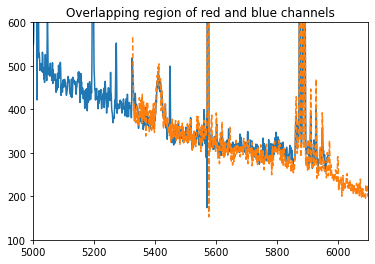

In [ ]:
path='./'

blue=np.loadtxt(path+'slit_c_win'+win[irow]+'_blue.txt', skiprows=1, delimiter=",")
xb, yb, ybo = np.transpose(blue)

red=np.loadtxt(path+'slit_c_win'+win[irow]+'_red.txt', skiprows=1, delimiter=",")
xr, yr, yro = np.transpose(red)

plt.plot(xb,yb)
plt.title("Overlapping region of red and blue channels")
plt.plot(xr,yr,linestyle='dashed')
plt.xlim(5000,6100)
plt.ylim(100,600)

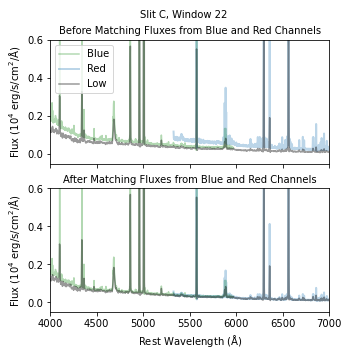

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(2,1,figsize=(5,5))
plt.subplots_adjust(hspace=0.2)
(ax1,ax2)= axes

ax1.plot(xb,ybo/1e4,label='Blue', color='green', alpha=0.3)
ax1.plot(xr,yro/1e4,label='Red', lw=2, alpha=0.3)

ax2.plot(xb,yb/1e4, color='green', alpha=0.3)
ax2.plot(xr,yr/1e4, lw=2, alpha=0.3)

ax1.set_title('Before Matching Fluxes from Blue and Red Channels',fontsize=10)
ax1.annotate('Slit C, Window '+win[irow], 
                        xy = (0.4,0.95), xytext = (0.4,0.95), 
                        xycoords='figure fraction', size = 10)
ax1.set_xlim(4000,7000)
ax2.set_xlim(4000,7000)
ax1.set_ylim(-0.05,0.6)
ax2.set_ylim(-0.05,0.6)
ax2.set_title('After Matching Fluxes from Blue and Red Channels',fontsize=10)
ax1.set_ylabel(r'Flux ($10^4$ erg/s/cm$^2$/$\rm{\AA}$)')
ax2.set_ylabel(r'Flux ($10^4$ erg/s/cm$^2$/$\rm{\AA}$)')
ax2.set_xlabel(r'Rest Wavelength ($\rm{\AA}$)')
ax1.plot(xl,yl/1e4, color='black', alpha=0.4, label='Low')
ax2.plot(xl,yl/1e4, color='black', alpha=0.4)
ax1.set_xticklabels([])

ax1.legend(loc='upper left',fontsize=10)

# Save plot
plt.savefig('matching_procedure.png',dpi=100,bbox_inches='tight')
            
plt.show()